In [1]:
import numpy as np
from garage.experiment import Snapshotter

2023-09-24 14:09:50.407441: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib::/home/kh-ryu/.mujoco/mujoco200/bin
2023-09-24 14:09:50.407460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
#run to test & visualize policy 

snapshotter = Snapshotter()

In [5]:
trpo_front_angle = np.zeros((4, 1000))

for seed in range(0, 4):
    for itr in range(0, 1000):
        if seed == 0:
            data_dir = '../experiments/Sparse_HalfCheetah_Diffstate/MaxTRPO'
        else:
            data_dir = '../experiments/Sparse_HalfCheetah_Diffstate/MaxTRPO_' + str(seed)
        data = snapshotter.load(data_dir, itr=itr)
        trpo_front_angle[seed, itr] = np.mean(data['stats'].last_episode[0]['observations'], axis=0)[1]

/home/kh-ryu/anaconda3/envs/surprise/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/kh-ryu/anaconda3/envs/surprise/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [6]:
curriculum_front_angle = np.zeros((4, 1000))

for seed in range(0, 4):
    for itr in range(0, 1000):
        if seed == 0:
            data_dir = '../experiments/Sparse_HalfCheetah_Diffstate/curriculum'
        else:
            data_dir = '../experiments/Sparse_HalfCheetah_Diffstate/curriculum_' + str(seed)
        data = snapshotter.load(data_dir, itr=itr)
        curriculum_front_angle[seed, itr] = np.mean(data['stats'].last_episode[0]['observations'], axis=0)[1]

In [7]:
# seed = 3
# trpo_front_angle = np.zeros(1000)

# for itr in range(0, 1000):
#     data_dir = '../experiments/Sparse_HalfCheetah_Diffstate/MaxTRPO_1'# + str(seed)
#     data = snapshotter.load(data_dir, itr=itr)
#     trpo_front_angle[itr] = np.mean(data['stats'].last_episode[0]['observations'], axis=0)[1]

In [8]:
# curriculum_front_angle = np.zeros(1000)

# for itr in range(0, 1000):
#     data_dir = '../experiments/Sparse_HalfCheetah_Diffstate/curriculum_1'# + str(seed)
#     data = snapshotter.load(data_dir, itr=itr)
#     curriculum_front_angle[itr] = np.mean(data['stats'].last_episode[0]['observations'], axis=0)[1]

In [9]:
trpo_front_angle = np.mean(trpo_front_angle, axis=0)
curriculum_front_angle = np.mean(curriculum_front_angle, axis=0)

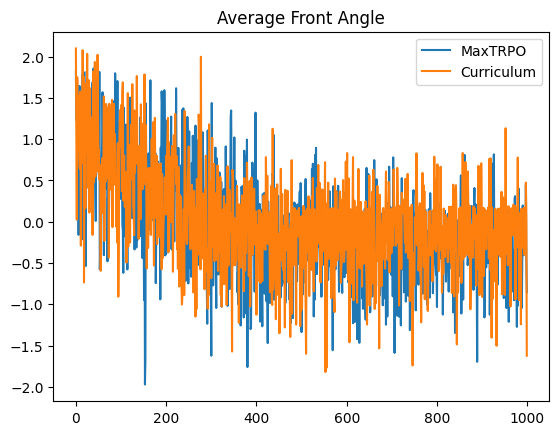

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

itr_range = np.arange(0, 1000)
ax.plot(itr_range, trpo_front_angle, label = 'MaxTRPO')
ax.plot(itr_range, curriculum_front_angle, label = 'Curriculum')
ax.set_title('Average Front Angle')
ax.legend()

In [11]:
abs_trpo_front_angle = np.abs(trpo_front_angle)
abs_curriculum_front_angle = np.abs(curriculum_front_angle)

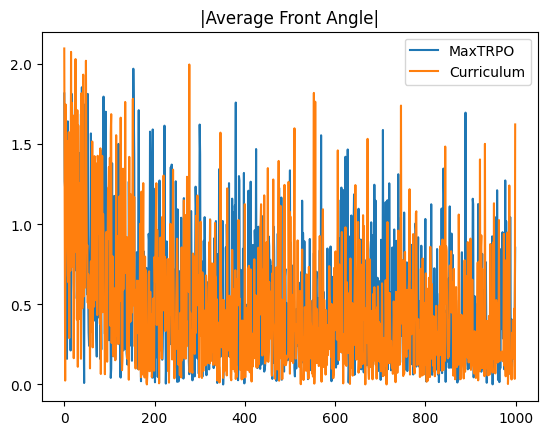

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

itr_range = np.arange(0, 1000)
ax.plot(itr_range, abs_trpo_front_angle, label = 'MaxTRPO')
ax.plot(itr_range, abs_curriculum_front_angle, label = 'Curriculum')
ax.set_title('|Average Front Angle|')
ax.legend()

In [12]:
print(abs_trpo_front_angle.mean())
print(abs_curriculum_front_angle.mean())

0.5283211590284911
0.47924877755714607


In [14]:
print(len(trpo_front_angle[abs_trpo_front_angle > 1.0]))
print(len(curriculum_front_angle[abs_curriculum_front_angle > 1.0]))

140
114


In [ ]:
data_dir = '../experiments/Sparse_HalfCheetah_Diffstate/curriculum'
itr = 0
data = snapshotter.load(data_dir, itr=itr)

policy = data['algo'].policy
# You can also access other components of the experiment
env = data['env']
# from load_rollout import rollout
from garage import rollout
path = rollout(env, policy, animated=False)

In [ ]:
np.sum(path['rewards'])

In [1]:
from garage.envs import GymEnv

env = GymEnv('HalfCheetah-v2')

2023-09-27 11:38:47.176680: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib::/home/kh-ryu/.mujoco/mujoco200/bin
2023-09-27 11:38:47.176710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/kh-ryu/anaconda3/envs/surprise/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [3]:
env.reset()
env.step(env.action_space.sample())

EnvStep(env_spec=EnvSpec(input_space=Box([-1. -1. -1. -1. -1. -1.], [1. 1. 1. 1. 1. 1.], (6,), float32), output_space=Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf], (17,), float32), max_episode_length=1000), action=array([-0.17425199, -0.9433444 ,  0.749022  ,  0.3219622 ,  0.38934994,
        0.796348  ], dtype=float32), reward=-0.20080172599768398, observation=array([ 0.07528148, -0.03894209,  0.02732964, -0.3492236 ,  0.3300186 ,
        0.08093213,  0.09826115,  0.18453914,  0.02392562, -0.31121337,
        0.5443076 , -0.63333458, -6.18249322,  6.33938318,  1.42214432,
        0.62264927,  6.1938696 ]), env_info={'reward_run': 0.03627021728539709, 'reward_ctrl': -0.23707194328308107, 'TimeLimit.truncated': False, 'GymEnv.TimeLimitTerminated': False}, step_type=<StepType.FIRST: 0>)

In [4]:
env.reset()
for i in range(1000):
    x = env.step(env.action_space.sample())
    print(x.reward)
    print(x.observation)

0.10048790161388896
[ 0.010364   -0.08120466 -0.02144834  0.27990217 -0.07715819  0.37402786
 -0.33994534  0.03523305  0.41434135 -1.04838875 -0.69573106 -0.30146293
  6.49628035 -1.98947209  9.7869804  -7.09541717  1.93768333]
0.06765459140600663
[-0.02715078 -0.11165185  0.19182314  0.29652213 -0.36097973  0.40246683
 -0.16100452 -0.16449254  0.10425782 -0.69092499 -0.57650958  5.33820177
 -2.20698047 -5.52187346 -4.21515684  7.55538736 -6.4618502 ]
-0.2867481517388907
[-0.07744374 -0.12830068  0.28193185  0.23161732 -0.26218471  0.11148266
  0.229645   -0.44063931 -0.31433216 -1.28337939 -0.07062395 -0.26145596
 -0.49502463  4.87447065 -5.31952679  5.51685385 -3.98589387]
-0.2036366994439599
[ -0.11422274   0.03965561   0.02602965   0.04640272   0.21598383
   0.18981504  -0.10272036  -0.14416632   0.3194975   -0.49951326
   4.99517393  -5.85458101  -6.20496856  10.71710832   4.56086853
 -10.09181202  10.1699727 ]
-0.22114846634613855
[-0.12969705  0.13960329 -0.18877247  0.24224165 

In [2]:
import numpy as np
from garage.experiment import Snapshotter
import argparse

2023-09-27 11:45:18.256088: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib::/home/kh-ryu/.mujoco/mujoco200/bin
2023-09-27 11:45:18.256108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
snapshotter = Snapshotter()

data_dir = '../experiments/Sparse_Hopper_Diffheight/curriculum'
itr = 500
data = snapshotter.load(data_dir, itr=itr)

/home/kh-ryu/anaconda3/envs/surprise/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [8]:
policy = data['algo'].policy
# You can also access other components of the experiment
env = data['env']
# from load_rollout import rollout

In [9]:
done = False
x = env.reset()
# env.render(mode='human')
state = x[0]
while not done:
    action = policy.get_action(state)[0]
    x = env.step(action)
    state = x.observation
    done = x.terminal
    print(state)

[ 1.24776272 -0.01132218 -0.00718152 -0.00360946  0.00284452 -0.16844262
 -0.09136941 -1.72094087 -1.37302322 -1.303122    1.53300756]
[ 1.24653631 -0.02408474 -0.02008326 -0.00872499  0.02061601 -0.04510496
 -0.2146429  -1.47016622 -1.85150009  0.02313329  2.90836126]
[ 1.24446429 -0.03299551 -0.03315209 -0.00557612  0.04415229  0.04754138
 -0.30298393 -0.75847814 -1.41610645  0.76342957  2.97573586]
[ 1.24163290e+00 -3.49564933e-02 -3.84507412e-02 -1.94832421e-03
  7.37045546e-02  9.94456145e-02 -4.04438299e-01  2.66334647e-01
  8.97029195e-02  1.44753946e-01  4.41051618e+00]
[ 1.23809289e+00 -2.65392900e-02 -3.21537890e-02  2.75242767e-03
  1.07134849e-01  2.07774819e-01 -4.77749244e-01  1.66388453e+00
  1.52032941e+00  5.86958851e-01  3.96898495e+00]
[ 1.23402715e+00 -1.06184700e-02 -1.36646290e-02  1.61478360e-03
  1.37561946e-01  1.53286995e-01 -5.39773789e-01  2.31589653e+00
  3.09979372e+00 -8.69856337e-01  3.63805025e+00]
[ 1.22946963  0.00545903  0.01118398 -0.01087811  0.168

RuntimeError: reset() must be called before step()!